In [22]:
import GPy
from pathlib import Path

import gp_retouch
from gp_retouch.retoucher import Retoucher
from gp_retouch.image.image_processor import ImageProcessor

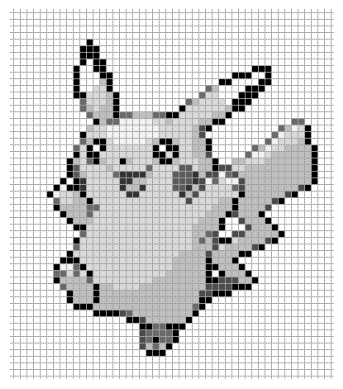

In [9]:
path_to_img = Path("..") / "tests" / "data" / "pikachu.png"
image = gp_retouch.load_image(path_to_img)
image.plot()

Going from (448, 392) to (89, 78)


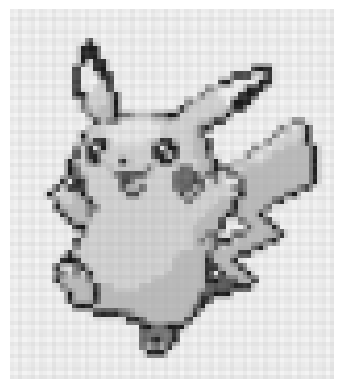

In [ ]:
small_image = ImageProcessor.downscale(image, factor=0.2)
print(f"Going from {image.shape} to {small_image.shape}")
small_image.plot()

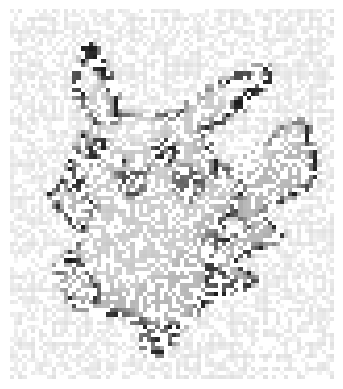

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i   f              |g|        
    14s16  4   3.224833e+11   8.965119e+22 
Runtime:     14s16
Optimization status: Maximum number of f evaluations reached



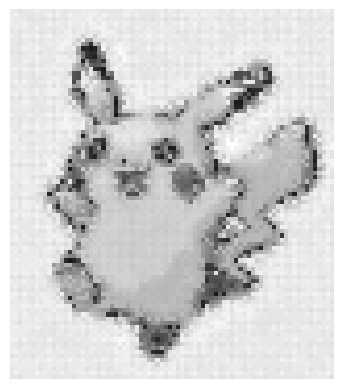

In [32]:
# Reconstructing an incomplete image
incomplete_image = ImageProcessor.drop_pixels(small_image, method="rnd", ratio=0.4)
incomplete_image.plot()

k = (
    GPy.kern.Matern52(input_dim=2, ARD=True)
    + GPy.kern.PeriodicExponential(input_dim=1, active_dims=0)
    + GPy.kern.PeriodicExponential(input_dim=1, active_dims=1)
)
retoucher = Retoucher(kernel=k)
retoucher.load_image(incomplete_image)
retoucher.learn_image(optimizer="bfgs", max_iters=2, messages=True)
reconstructed_image = retoucher.reconstruct_image()
reconstructed_image.plot()